#**Исследовательский проект Беликовой Марии и Воловика Вадима**

##**Часть 1**

---
**Цель исследования**: оценить количество и время сна среди испытуемых в проведённом опросе и выявить факторы, влияющие на качество сна.

**Задачи**:

*   Найти датасет с наблюдениями сна испытуемых
*   Изменить данные в датасете для удобной обработки
*   Выдвинуть гипотезы согласно цели исследования и имеющимся переменным
*   Подтвердить или опровергнуть гипотезы, используя различные методы анализа данных
*   Сделать общие выводы относительно полученных результатов


Данные взяты с сайта https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency

Работа выполняется с готового датасета Sleep Efficiency Dataset

In [1]:
# Все необходимые библиотеки.
import pandas as pd
import seaborn as sns
from scipy.stats import norm

In [2]:
# Считывание и создание датасета.
df = pd.read_csv("Sleep_Efficiency.csv", index_col = 0)
df

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
ID,,,,,,,,,,,,,,
1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,25,57,21,0.0,0.0,0.0,No,5.0
449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,21,4.0,25.0,0.0,No,3.0
450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,30,48,1.0,NaN,3.0,Yes,0.0


In [3]:
# Описание датасета.
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 1 to 452
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    int64  
 1   Gender                  452 non-null    object 
 2   Bedtime                 452 non-null    object 
 3   Wakeup time             452 non-null    object 
 4   Sleep duration          452 non-null    float64
 5   Sleep efficiency        452 non-null    float64
 6   REM sleep percentage    452 non-null    int64  
 7   Deep sleep percentage   452 non-null    int64  
 8   Light sleep percentage  452 non-null    int64  
 9   Awakenings              432 non-null    float64
 10  Caffeine consumption    427 non-null    float64
 11  Alcohol consumption     436 non-null    float64
 12  Smoking status          452 non-null    object 
 13  Exercise frequency      446 non-null    float64
dtypes: float64(6), int64(4), object(4)
memory 

(452, 14)

---

***Во взятом нами датасете есть 14 переменных и 452 наблюдения.***


**Переменные**:

**Age** - метрическая переменная (тип данных в колонке int64). Показывает возраст объекта исследования в полных годах. Пустых значений - нет.

**Gender** - категориальная переменная (тип данных в колонке object). Показывает гендер объекта исследования (Male, Female). Пустых значений - нет.

**Bedtime** - метрическая переменная (тип данных в колонке object). Показывает время, когда объект исследования лёг спать. Пустых значений - нет.

**Wakeup time** - метрическая переменная (тип данных в колонке object). Показывает время, когда объект исследования проснулся. Пустых значений - нет.

**Sleep duration** - метрическая переменная (тип данных в колонке float64). Показывает время сна объекта исследования в часах. Пустых значений - нет.

**Sleep efficiency** - метрическая переменная (тип данных в колонке float64). Показывает отношение времени реального сна от общего времени, проведённого в кровати, объекта исследования. Пустых значений - нет.

**REM sleep percentage** - метрическая переменная (тип данных в колонке int64). Показывает процент "быстрого сна" объекта исследования. Пустых значений - нет.

**Deep sleep percentage** - метрическая переменная (тип данных в колонке int64). Показывает процент "глубокого сна" объекта исследования. Пустых значений - нет.

**Light sleep percentage** - метрическая переменная (тип данных в колонке int64). Показывает процент "лёгкого сна" объекта исследования. Пустых значений - нет.

**Awakenings** - метрическая переменная (тип данных в колонке float64). Показывает количество пробуждений ото сна объекта исследования. Пустых значений - 20.

**Caffeine consumption** - метрическая переменная (тип данных в колонке float64). Показывает сколько объект исследования выпил кофеина за последние сутки в миллиграммах. Пустых значений - 25.

**Alcogol consumption** - метрическая переменная (тип данных в колонке float64). Показывает сколько объект исследования выпил алкоголя за последние сутки в унциях. Пустых значений - 16.

**Smoking status** - категориальная переменная (тип данных в колонке object). Показывает курит ли объект исследования. Пустых значений - 25.

**Exercise frequency** - метрическая переменная (тип данных в колонке float64). Показывает сколько раз объект исследования занимается спортом в неделю. Пустых значений - 6.

---

**Заменяем все Nan-значения переменных на медиану соответсвующей переменной**

**Изменяем типы данных некоторых переменных на более подходящие:**

BedTime, WakeupTime --> в тип datetime64

Awakenings, Caffeine consumption, Alcohol consumption, Exercise frequency --> в тип int

**Разбиваем категориальные переменные Gender и Smoking status по категориям**

In [4]:
# Заменяем Nan значения на медиану переменной.
df['Awakenings'] = df['Awakenings'].fillna(df['Awakenings'].median())
df['Caffeine consumption'] = df['Caffeine consumption'].fillna(df['Caffeine consumption'].median())
df['Alcohol consumption'] = df['Alcohol consumption'].fillna(df['Alcohol consumption'].median())
df['Exercise frequency'] = df['Exercise frequency'].fillna(df['Exercise frequency'].median())

# Меняем типы переменных.
df['Bedtime'] = pd.to_datetime(df['Bedtime'])
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'])
df = df.astype({'Awakenings': int, 'Caffeine consumption': int, 'Alcohol consumption': int, 'Exercise frequency': int})

# Разбиение категориальных переменных по категориям.
df['Gender'] = pd.Categorical(df['Gender'])
df['Smoking status'] = pd.Categorical(df['Smoking status'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 1 to 452
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Age                     452 non-null    int64         
 1   Gender                  452 non-null    category      
 2   Bedtime                 452 non-null    datetime64[ns]
 3   Wakeup time             452 non-null    datetime64[ns]
 4   Sleep duration          452 non-null    float64       
 5   Sleep efficiency        452 non-null    float64       
 6   REM sleep percentage    452 non-null    int64         
 7   Deep sleep percentage   452 non-null    int64         
 8   Light sleep percentage  452 non-null    int64         
 9   Awakenings              452 non-null    int64         
 10  Caffeine consumption    452 non-null    int64         
 11  Alcohol consumption     452 non-null    int64         
 12  Smoking status          452 non-null    category  

Создание переменной **Real Sleep Time**, показывающей реальное время сна (путём перемножения времени проведённого в кровати и отношения Sleep efficiency)

In [5]:
df['Real sleep time'] = df['Sleep duration'] * df['Sleep efficiency']
df

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Real sleep time
ID,,,,,,,,,,,,,,,
1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0,0,0,Yes,3,5.280
2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3,0,3,Yes,3,4.620
3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1,0,0,No,3,7.120
4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3,50,5,Yes,1,3.060
5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3,0,3,No,3,6.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,25,57,21,0,0,0,No,5,6.825
449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,21,4,25,0,No,3,4.440
450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,30,48,1,25,3,Yes,0,4.675


Перекодировка метрической переменной **Exercise frequency** в категориальную по следующим правилам:

0 --> No exercising

1 --> Once a week

2-3 --> Normally

4+ --> Often

In [6]:
def get_exercise_gr(x):
    if x == 0:
        return 'No exercising'
    elif x == 1:
        return 'Once a week'
    elif x >= 2 and x <= 3:
        return 'Normally'
    else:
      return 'Often'

df['Exercise frequency'] = df['Exercise frequency'].apply(get_exercise_gr)
df

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Real sleep time
ID,,,,,,,,,,,,,,,
1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0,0,0,Yes,Normally,5.280
2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3,0,3,Yes,Normally,4.620
3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1,0,0,No,Normally,7.120
4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3,50,5,Yes,Once a week,3.060
5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3,0,3,No,Normally,6.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,25,57,21,0,0,0,No,Often,6.825
449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,21,4,25,0,No,Normally,4.440
450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,30,48,1,25,3,Yes,No exercising,4.675


Транспонированный срез по первым 10 наблюдениям

In [7]:
df[0:10].T

ID,1,2,3,4,5,6,7,8,9,10
Age,65,69,40,40,57,36,27,53,41,11
Gender,Female,Male,Female,Female,Male,Female,Female,Male,Female,Female
Bedtime,2021-03-06 01:00:00,2021-12-05 02:00:00,2021-05-25 21:30:00,2021-11-03 02:30:00,2021-03-13 01:00:00,2021-07-01 21:00:00,2021-07-21 21:00:00,2021-08-16 00:30:00,2021-04-05 02:30:00,2021-09-16 01:00:00
Wakeup time,2021-03-06 07:00:00,2021-12-05 09:00:00,2021-05-25 05:30:00,2021-11-03 08:30:00,2021-03-13 09:00:00,2021-07-01 04:30:00,2021-07-21 03:00:00,2021-08-16 10:30:00,2021-04-05 08:30:00,2021-09-16 10:00:00
Sleep duration,6.0,7.0,8.0,6.0,8.0,7.5,6.0,10.0,6.0,9.0
Sleep efficiency,0.88,0.66,0.89,0.51,0.76,0.9,0.54,0.9,0.79,0.55
REM sleep percentage,18,24,20,28,27,28,28,28,28,18
Deep sleep percentage,70,28,70,25,55,60,25,57,60,35
Light sleep percentage,10,53,10,52,18,17,52,20,17,45
Awakenings,0,3,1,3,3,0,2,0,3,4


Многоуровневая сортировка для выявления людей с самыми низкими показателями времени сна

In [8]:
df.sort_values(by=['Sleep duration', 'Real sleep time'], ascending = [True, True]).head(20)[['Sleep duration', 'Real sleep time']]

,Sleep duration,Real sleep time
ID,,
392,5.0,2.60
368,5.0,3.70
91,5.0,4.00
199,5.0,4.30
214,5.0,4.30
233,5.0,4.35
306,5.0,4.50
111,5.0,4.55
331,5.5,3.74


### Гипотезы

---

**Гипотезы исследования**:

**H1**. Большая часть людей спит 7-8 часов.

**H2**. Спортивная активность положительно сказывается на количестве сна.

**H3**. Большая часть людей ложится спать до полуночи (здоровое время).

**H4**. Ранний отход ко сну ведет к большей эффективности сна.

**H5**. Люди, употребляющие больше кофе, ложатся позже.

**H6**. Женщины спят беспокойнее мужчин (чаще просыпаются).

**H7**. Чем младше испытуемый, тем больше процент глубокого сна.

**H8**. Курящие люди в среднем дольше засыпают, чем некурящие.

**H9**. Чем больше выпито алкоголя - тем менее эффективен сон.

**H10**. Кофеин понижает эффективность сна.

---

**H1**. Большая часть людей спит 7-8 часов.


In [9]:
df.describe()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Real sleep time
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,40.285398,7.465708,0.788916,23.002212,52.960177,24.831858,1.612832,23.727876,1.201327,5.886604
std,13.172250,0.866625,0.135237,3.972466,15.561713,15.150774,1.332891,29.355363,1.630284,1.203197
min,9.000000,5.000000,0.500000,15.000000,20.000000,7.000000,0.000000,0.000000,0.000000,2.600000
25%,29.000000,7.000000,0.697500,20.000000,51.250000,15.000000,1.000000,0.000000,0.000000,5.025000
50%,40.000000,7.500000,0.820000,22.000000,60.000000,18.000000,1.000000,25.000000,0.000000,6.075000
75%,52.000000,8.000000,0.900000,27.000000,63.000000,27.250000,3.000000,50.000000,2.000000,6.727500
max,69.000000,10.000000,0.990000,30.000000,75.000000,56.000000,4.000000,200.000000,5.000000,9.200000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


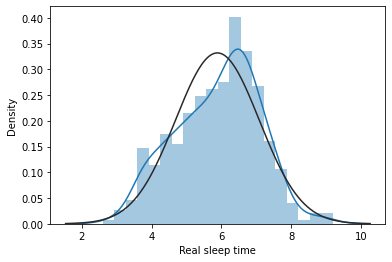

In [10]:
sns.distplot(df['Real sleep time'], fit = norm, bins = 20)

Для выявления правдивости гипотезы выведем описательную статистику по всему датасету (пригодится и для общего представления о датасете). Обратимся к переменной **Real sleep time**, отвечающей за реальное количество сна испытуемого. В описательной статистике обратимся к значению **mean** (среднее время сна) и к **перцентилям**. Построим гистограмму и сравним распределение данных с нормальным распределением.

**Вывод**: cреднее время сна - 5.88 ч, более 75% испытуемых спят меньше 7 часов. **Гипотеза опровергнута**.

---

**H2**. Спортивная активность положительно сказывается на количестве сна.

In [11]:
print(df[df['Exercise frequency'] == "No exercising"]['Real sleep time'].describe())
print("----------------------")
print(df[df['Exercise frequency'] == "Once a week"]['Real sleep time'].describe())
print("----------------------")
print(df[df['Exercise frequency'] == "Normally"]['Real sleep time'].describe())
print("----------------------")
print(df[df['Exercise frequency'] == "Often"]['Real sleep time'].describe())
print("----------------------")

count    116.000000
mean       5.634698
std        1.212159
min        3.500000
25%        4.727500
50%        5.500000
75%        6.487500
max        9.200000
Name: Real sleep time, dtype: float64
----------------------
count    97.000000
mean      5.768763
std       1.263359
min       2.600000
25%       4.800000
50%       6.000000
75%       6.720000
max       8.370000
Name: Real sleep time, dtype: float64
----------------------
count    190.000000
mean       5.973921
std        1.205905
min        3.120000
25%        5.212500
50%        6.160000
75%        6.787500
max        9.000000
Name: Real sleep time, dtype: float64
----------------------
count    49.000000
mean      6.377653
std       0.840283
min       3.640000
25%       6.000000
50%       6.440000
75%       6.960000
max       7.600000
Name: Real sleep time, dtype: float64
----------------------


Для проверки гипотезы соберём описательную статистику по группам количества физической активности в неделю (**Exercise frequency**, **Real sleep time**)

**Вывод**: по среднему количеству сна, а также по половинному перцентилю видно, что количество сна с ростом физической активности увеличивается. **Гипотеза подтверждена**.

---

**H3**. Большая часть людей ложится спать до полуночи (здоровое время).

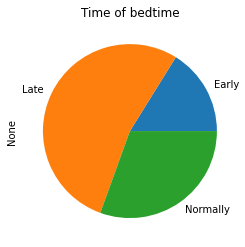

In [12]:
def get_bedtime_category(x):
  if (x == 21):
    return "Early"
  if (x == 23 or x == 22):
    return "Normally"
  return "Late"

df["Time of bedtime"] = df["Bedtime"].dt.hour.apply(get_bedtime_category)

df.groupby("Time of bedtime").size().plot(kind='pie', title = "Time of bedtime")

Для проверки правдивости гипотезы создадим новую категориальную переменную, отвечающую за время отхода ко сну: 

21:00 - 21:59 --> Early

22:00 - 23:59 --> Normally

00:00 - 02:59 --> Late

Далее потроим круговую диаграмму по этим значениям.

**Вывод**: более половины испытуемых ложились спать позже полуночи, что не соответствует норме здорового отхода ко сну (22 - 23 часа вечера). **Гипотеза опровергнута**.

---

**H4**. Ранний отход ко сну ведет к большей эффективности сна.

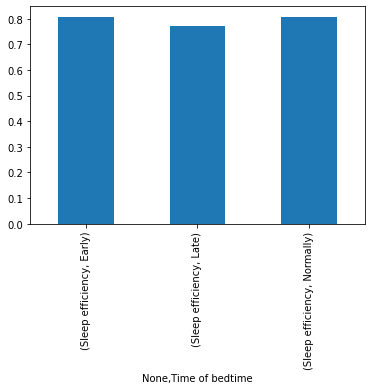

In [13]:
df.groupby("Time of bedtime")[['Sleep efficiency']].mean().unstack().plot(kind='bar', stacked=True)

Для проверки гипотезы построим столбиковую диаграмму для визуализации данных по переменным **Time of bedtime** и **Sleep efficiency** (группируем по первой).

**Вывод**: эффективность сна практически не зависит от времени отхода ко сну. **Гипотеза опровергнута**.

---

**H5**. Люди, употребляющие больше кофе, ложатся позже. 

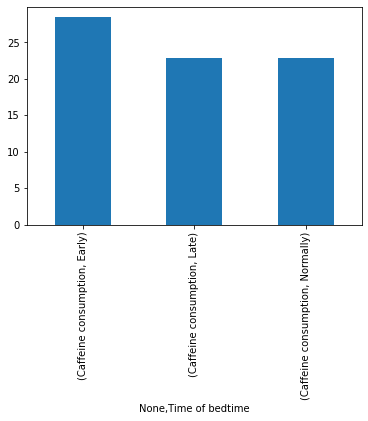

In [14]:
df.groupby("Time of bedtime")[['Caffeine consumption']].mean().unstack().plot(kind='bar', stacked=True)

Для проверки гипотезы построим столбиковую диаграмму для визуализации данных по переменным **Time of bedtime** и **Caffeine consumption** (группируем по первой).

**Вывод**: люди, употребляющие больше кофе, склонны ложиться раньше. Вопреки ожиданиям, **гипотеза опровергнута**.

---

**H6**. Женщины спят беспокойнее мужчин (чаще просыпаются).

In [15]:
h2 = df.groupby('Gender')[['Awakenings']].mean()
h2

,Awakenings
Gender,
Female,1.513393
Male,1.710526


Для выявления правдивости гипотезы построим сводную таблицу по переменным **Awakenings** и **Gender**.

**Вывод**: женщины и мужчины в среднем просыпались одинаковое количество раз (мужчины чуть больше). **Гипотеза не нашла подтвердждения**.

---

**H7**. Чем младше испытуемый, тем больше процент глубокого сна.

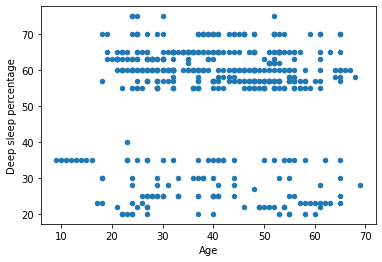

In [16]:
df.plot.scatter(x = 'Age', y = 'Deep sleep percentage')

Построим диаграмму рассеивания по переменным **Age** и **Deep sleeep percentage**.

**Вывод**: явного распределения процента глубокого сна в сторону младших представителей наблюдений не выявлено. Учитывая количество наблюдений по каждому возрасту, можно сделать вывод, что зависимости процента глубокого сна от возраста не выявлено. **Гипотеза опровергнута**.

---

**H8**. Курящие люди в среднем дольше засыпают, чем некурящие.



In [17]:
df.groupby('Smoking status')[['Sleep efficiency']].mean()

,Sleep efficiency
Smoking status,
No,0.822234
Yes,0.728696


Для выявления правдивости гипотезы построим сводную таблицу по переменным **Awakenings** и **Sleep efficiency** и посмотрим среднее значение эффективности сна по группам.

**Вывод**: эффективность сна некурящих на 10% больше эффективности сна курящих, что означает, что курящие засыпают в среднем на 10% дольше относительно некурящих. **Гипотеза подтверждена**.

---

**H9**. Чем больше выпито алкоголя - тем менее эффективен сон.

In [18]:
df.groupby('Alcohol consumption')[['Sleep efficiency']].mean()

,Sleep efficiency
Alcohol consumption,
0,0.838233
1,0.797018
2,0.667500
3,0.748200
4,0.683750
5,0.685000


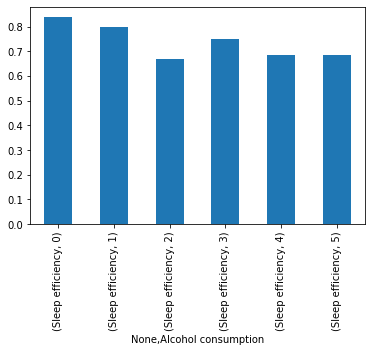

In [19]:
df.groupby('Alcohol consumption')[['Sleep efficiency']].mean().unstack().plot(kind='bar', stacked=True)

Для проверки гипотезы построим сводную таблицу и столбиковую диаграмму для визуализации данных по переменным **Alcohol consumption** и **Sleep efficiency**.

**Вывод**: виден тренд на снижение эффективности сна при увеличении количества выпитого алкоголя. **Гипотеза подтверждена**.

---

**H10**. Кофеин понижает эффективность сна.

In [20]:
df.corr().style.background_gradient(cmap='coolwarm')

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Real sleep time
Age,1.000000,-0.062462,0.098357,-0.020479,0.015070,-0.044623,-0.016677,-0.169223,-0.026430,0.043754
Sleep duration,-0.062462,1.000000,-0.027467,0.005819,-0.029449,0.033588,-0.000962,-0.014792,-0.010796,0.537030
Sleep efficiency,0.098357,-0.027467,1.000000,0.090021,0.792730,-0.820629,-0.552179,0.062904,-0.423208,0.823053
REM sleep percentage,-0.020479,0.005819,0.090021,1.000000,-0.148563,0.067830,-0.071865,0.121714,-0.089086,0.080458
Deep sleep percentage,0.015070,-0.029449,0.792730,-0.148563,1.000000,-0.986315,-0.290547,-0.003023,-0.392713,0.649167
Light sleep percentage,-0.044623,0.033588,-0.820629,0.067830,-0.986315,1.000000,0.309913,-0.004221,0.407129,-0.670008
Awakenings,-0.016677,-0.000962,-0.552179,-0.071865,-0.290547,0.309913,1.000000,-0.107535,0.196152,-0.462004
Caffeine consumption,-0.169223,-0.014792,0.062904,0.121714,-0.003023,-0.004221,-0.107535,1.000000,-0.139421,0.046897
Alcohol consumption,-0.026430,-0.010796,-0.423208,-0.089086,-0.392713,0.407129,0.196152,-0.139421,1.000000,-0.356929
Real sleep time,0.043754,0.537030,0.823053,0.080458,0.649167,-0.670008,-0.462004,0.046897,-0.356929,1.000000


Для проверки правдивости гипотезы обратимся к таблице корреляции по всем метрическим переменным.

**Вывод**: переменная **Caffeine consumption** имеет крайне слабую корреляцию с переменными **Sleep efficiency**, **Deep sleep percentage**, **Light sleep percentage**, **Real sleep time**. Т.е. качество сна не зависит от кофеина. Вопреки ожиданиям **гипотеза опровергнута**.

---

##**Выводы**:


В ходе исследования был найден и обработан датасет и проверены 10 гипотез о количестве и времени сна испытуемых, а также о факторах, влияющих на его качество.

**Количество**: предполагалось, что большая часть испытуемых спит 7-8 часов (норма), однако количество часов сна оказалось меньше - в среднем 6,5. Спортивная активность, как и ожидалось, действительно улучшает продолжительность сна - чем больше человек тренируется, тем дольше он спит. 

**Время**: предполагалось, что большая часть людей ложится спать не слишком поздно, в рамках нормы - однако больше половины испытуемых ложились спать после полуночи. К удивлению, любители кофе засыпают раньше тех, кто употреблял его в меньших количествах или не употреблял вовсе - гипотеза так же не оправдалась. Также не выявилось зависимости между временем отхода ко сну и эффективностью сна - ожидалось, что те, кто ложатся спать раньше - делают это эффективнее.

**Факторы, влияющие на качество сна**: 

- **возраст**: ожидалось, что дети спят глубже взрослых, однако явной зависимости между возрастом и глубиной сна не было выявлено;

- **пол**: предполагалось, что женщины спят беспокойнее мужчин, но представители обоих полов просыпаются в среднем одинаковое количество раз за ночь;

- **курение**: предполагалось, что курильщики засыпают дольше некурящих, и это подтвердилось;

- **алкоголь**: ожидалось, что эффективность сна при принятии алкоголя снижается, и это подтвердилось;

- **кофеин**: преполагалось, что употребление кофеина снижает качество сна, но, к удивлению, кофеин практически не влияет на эффективность сна и распределение трех фаз сна.

Таким образом, на сон не влияет пол, возраст опрошенных и количество употребленного кофеина. Негативно влияют курение и алкоголь.

##**Часть 2**

In [21]:
# Импорт
import requests
from bs4 import BeautifulSoup
import datetime
import time
import pandas as pd

In [22]:
# Функция парсит дату
def GetDateFromString(s):
    monthes = {"января" : 1, "февраля" : 2, "марта" : 3, "апреля" : 4, "мая" : 5, "июня" : 6, "июля" : 7, "августа" : 8, "сентября" : 9, "октября" : 10, "ноября" : 11, "декабря" : 12}
    day = int(s.split(' ')[0])
    month = monthes[s.split(' ')[1]]
    year = int(s.split(' ')[2][:-1])
    return datetime.date(year, month, day)

In [23]:
# Функция возвращает список ингредиентов (без повторов - множество)
def GetListOfIngredients(url):
    recipe_page = BeautifulSoup(requests.get(url).text, 'html.parser')
    ingredients = set()
    for ingredient in recipe_page.findAll('li', {'itemprop' : 'recipeIngredient'}):
        ingredients.add(ingredient.findAll('span')[0].text)
    return ingredients

In [24]:
def GetInfoAboutRecipe(url):

    # Получение страницы рецепта
    recipe_page = BeautifulSoup(requests.get(url).text, 'html.parser')

    # Получение имя автора (если существует)
    if len(recipe_page.findAll('span', {'itemprop' : 'author'})) != 0:
        author = recipe_page.findAll('span', {'itemprop' : 'author'})[0].text
    else:
        author = None

    # Получение даты публикации
    date_of_publication = GetDateFromString(recipe_page.findAll('span', {'class' : 'i-time'})[0].text)

    # Получение количества просмотров
    amount_of_views = int(recipe_page.findAll('span', {'class' : 'i-views'})[0].text)

    # Получение категории (если существует, иначе - дефолтная)
    if len(recipe_page.findAll('span', {'itemprop' : 'recipeCategory'})) != 0:
        category = recipe_page.findAll('span', {'itemprop' : 'recipeCategory'})[-1].findAll('a')[0].text.strip()
    else:
        category = "Десерты"

    # Получение списка ингредиентов 
    list_of_ingredients = GetListOfIngredients(url)
    amount_of_ingredients = len(list_of_ingredients)
    is_milk = False
    if "Молоко" in list_of_ingredients:
        is_milk = True

    # Получение БЖУ на 100 граммов
    nutrients = []
    for i in range(7, 10):
        for x in recipe_page.findAll('div', {'itemprop' : 'nutrition'}):
            nutrients.append(float(x.findAll('td')[i].findAll('strong')[0].text.split(' ')[0])) 
    
    proteins = nutrients[0]
    fats = nutrients[1]
    carbons = nutrients[2]

    return author, date_of_publication, amount_of_views, category, amount_of_ingredients, is_milk, proteins, fats, carbons

In [25]:
# Словарь ссылок на страницы с конкретными рецептами
recipes_urls = {};
# Словарь с информацией о конкретном рецепте
recipes_info = {};

# Ссылка на страницу с рецептами
url = "https://www.povarenok.ru/recipes/category/30/~0"

# Цикл для перехода на следующую страницу
for i in range(1, 8):
    # Изменение адреса сайта для перехода на следующую страницу
    url = url[:-1]
    url += str(i)

    # Получение общей страницы
    page = BeautifulSoup(requests.get(url).text, 'html.parser')

    # Цикл по разделам превью рецептов (сбор ссылок)
    for recipe in page.findAll('article', {'class': 'item-bl'}):
        recipe_name = list(recipe.findAll('a'))[1].text;
        recipes_urls[recipe_name] = list(recipe.findAll('a'))[0]['href']
        recipes_info[recipe_name] = (None, None, None, None, None, None, None, None, None)

# Цикл по страницам рецептов
for recipe in recipes_urls:
    recipes_info[recipe] = GetInfoAboutRecipe(recipes_urls[recipe])
    time.sleep(2)

# Сохранение данных в датафрейм
df = pd.DataFrame(recipes_info).T
df.columns = ["Автор рецепта", "Дата публикации", "Количество просмотров", "Категория", "Количество ингредиентов", "Есть ли молоко", "Белки", "Жиры", "Углеводы"]
df.to_excel("Recipes.xlsx")